In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [19]:
df = pd.read_csv("A2_data.csv")

In [20]:
# # drop row 79543
df = df.drop(79543, axis=0)

In [21]:
# transform classes to numbers
labels_numeric = df['class'].map({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

labels = df['class']
# drop the class column
df = df.drop(['class','field_ID','plate','MJD'], axis=1)

In [22]:
df.head()

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,-0.001584
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,-0.824700
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,-0.418000
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,5.953000
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.846000


PCA

In [23]:
# apply PCA

scaler = StandardScaler()

pca = PCA(n_components=2)
scaled = scaler.fit_transform(df)


# pca.fit(scaled)

transformed = pca.fit_transform(scaled)

In [24]:
transformed_pca = pd.DataFrame(transformed, columns=['PC1', 'PC2'])

key=transformed_pca.keys()
transformed_pca

,PC1,PC2
0,-0.902578,0.008765
1,-2.981371,0.054978
2,-1.368684,0.173273
3,-1.703697,0.328896
4,3.602040,1.073680
...,...,...
99994,-2.230306,-1.940724
99995,-1.063393,-1.221326
99996,1.557219,0.016833
99997,-0.799520,1.079741


Visualizing decision boundaries

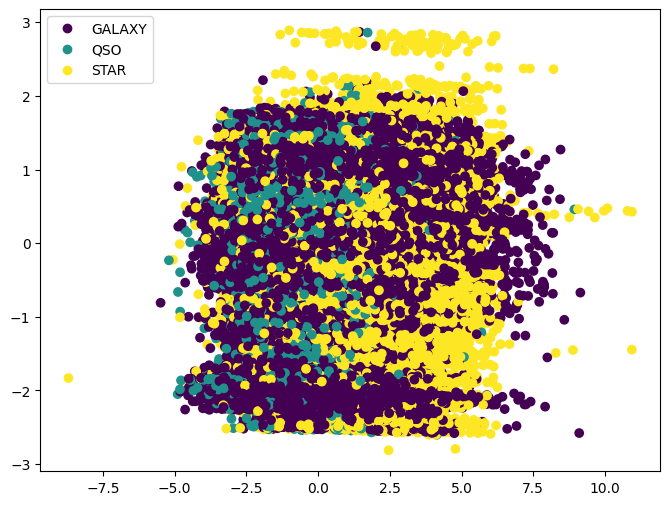

In [25]:
# plot the data

# plt.scatter(transformed_pca.iloc[:,0], transformed_pca.iloc[:,1]) #, c=labels)
# plt.show()

plt.figure(figsize=(8,6))
plot = plt.scatter(transformed_pca.iloc[:,0], transformed_pca.iloc[:,1], c=labels_numeric)
plt.legend(handles=plot.legend_elements()[0], labels=list(labels.unique()))

plt.show()

Adaboost

In [26]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(transformed_pca, labels, test_size=0.3, random_state=123, stratify=labels)


In [27]:
# clf = AdaBoostClassifier(random_state=123)

Hyperparameter Optimisation

In [28]:
# parameters = {
#     'n_estimators': [5,10,20,30,50,70],
#     'learning_rate': [0.1,0.3,0.5,0.8,1],
#     'algorithm': ['SAMME', 'SAMME.R']
# }
# gr_ada = GridSearchCV(clf, parameters, cv=5, verbose=2, n_jobs=-1)
# gr_ada.fit(x_train, y_train)

In [29]:
# gr_ada.best_params_

In [30]:
clf = AdaBoostClassifier(
    algorithm = 'SAMME.R',
    learning_rate = 0.8,
    n_estimators = 70
)
clf.fit(x_train, y_train)


AdaBoostClassifier(learning_rate=0.8, n_estimators=70)

Test and Evaluation

In [31]:
from sklearn.metrics import accuracy_score, f1_score

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_

In [32]:
print('features importances are : ' , clf.feature_importances_)

features importances are :  [0.64285714 0.35714286]


<BarContainer object of 2 artists>

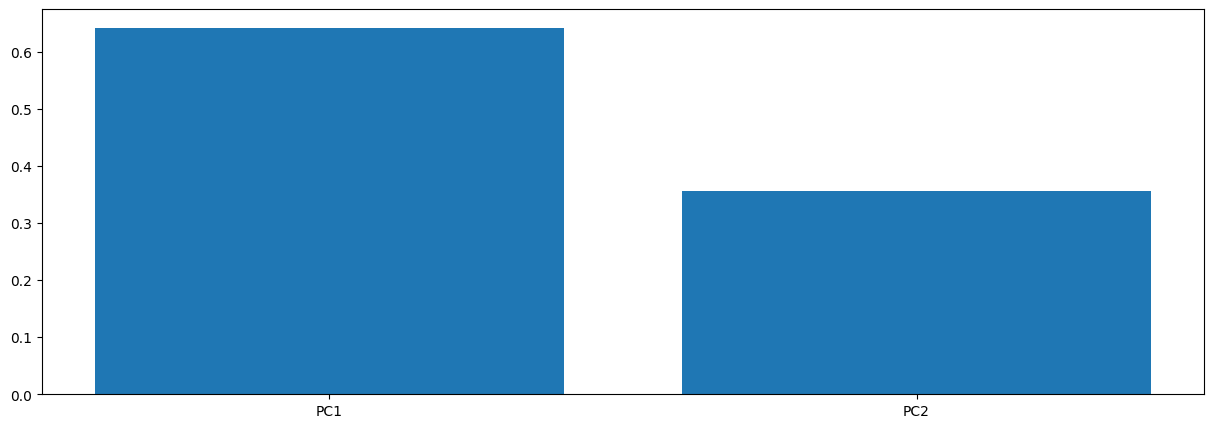

In [33]:
#Visualize feature importance

plt.figure(figsize=(15,5))
plt.bar(key,clf.feature_importances_)

In [34]:
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_


Classification report and confusion matrix

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      GALAXY       0.60      0.99      0.75     17834
         QSO       0.00      0.00      0.00      5688
        STAR       0.61      0.06      0.11      6478

    accuracy                           0.60     30000
   macro avg       0.41      0.35      0.29     30000
weighted avg       0.49      0.60      0.47     30000

[[17631     0   203]
 [ 5636     0    52]
 [ 6071     0   407]]


c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Visualization of Confusion Matrix

Text(43.25, 0.5, 'True')

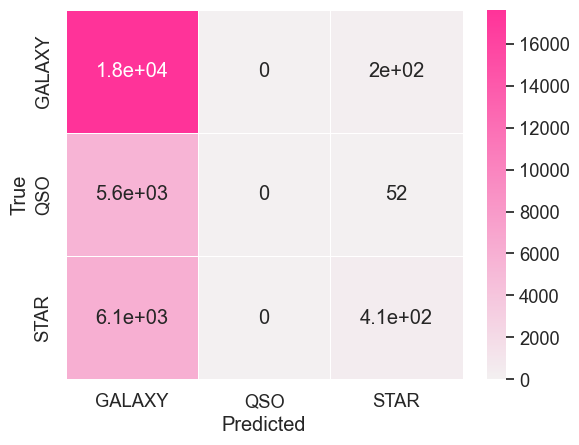

In [36]:
cm = pd.DataFrame(cm, index=sortedlabels, columns=sortedlabels)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')